In [3]:
%matplotlib inline

In [76]:
import matplotlib;
matplotlib.use("pdf");

import matplotlib.pyplot as plt;
import matplotlib.backends.backend_pdf as pdf;
import matplotlib.gridspec as gs;
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

### CORT Data

In [83]:
data = pd.read_csv('/data/gergely/invivo_DATA/structural/Summary/SummaryData.csv')

In [84]:
data.head()

,segment,spine/micron,condition
0,gts2_a1_R3_s1,0.428151,bsline
1,gts2_a1_R3_s2,0.305755,bsline
2,gts2_a1_R3_s3,0.275387,bsline
3,gts2_a1_R2_s1,0.429594,bsline
4,gts2_a1_R2_s2,0.265487,bsline


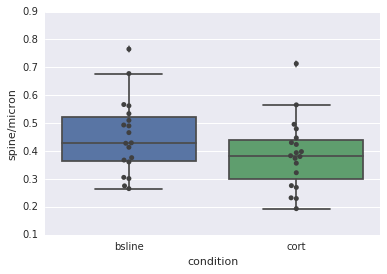

In [85]:
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
# ax1 = sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data,
#                     color=".25")

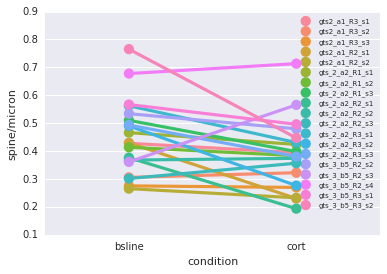

In [90]:
fig, ax = plt.subplots()
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
leg = ax.legend(loc='upper right', fontsize='xx-small')

ValueError: num must be 1 <= num <= 1, not 2

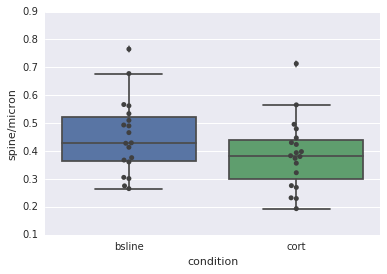

In [88]:
pages = pdf.PdfPages("/data/gergely/Summaries/_structural/gts2_3cohorts_interimSum.pdf")
plt.subplot(111)
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
plt.subplot(112)
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
# leg = ax.legend(loc='upper right', fontsize='xx-small')



# figure(figsize=(4,5))
# ax = fig.add_subplot(111)
# sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
# leg = ax.legend(loc='upper right', fontsize='xx-small')
# ax = fig.add_subplot(112)
# ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
# ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
pages.close()

### Control Data

In [91]:
data = pd.read_csv('/data/gergely/invivo_DATA/structural/Summary/SummaryDataCtrl.csv')

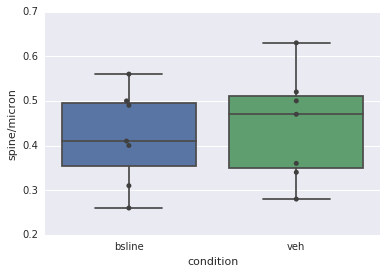

In [92]:
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")

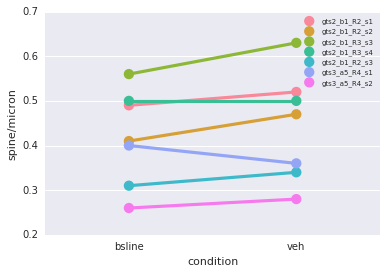

In [93]:
fig, ax = plt.subplots()
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
leg = ax.legend(loc='upper right', fontsize='xx-small')